In [44]:
# maf_sghmc is the package containing our algorithms 
from maf_sghmc.alg import * 
from maf_sghmc.grad import * 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from functools import partial 

### Test Case 1 
Under the same sampling environment setup, our algorithms yields the same result as the Chen et al paper does, by comparing the Figure 1 in this notebook and the Figure 1 in Chen at el paper. (Please see Reference 1 for the paper) 

In [26]:
### Figure 1

## potential energy function
U = lambda x:  -2*x**2 + x**4
gradU =  lambda x: -4 * x +  4 * x**3 


## parameters
theta_init = np.array([0])
M = np.eye(1)
epsilon=0.1
T=15000
m=50
V = np.array([4])
C = np.array([3]) 
V_hat = np.array([4])


## true distribution
xs = np.linspace(-2,2,200)
ys = np.exp(-U(xs))
ys = (ys/sum(ys))/(xs[1]-xs[0])

In [27]:
theta_sghmc1, r_sghmc1 = sghmc_with_grad(gradU, theta_init, M , C , V_hat, epsilon, T, m)

In [28]:
theta_hmc_mh1, r_hmc_mh1 = hmc(gradU, U, theta_init, M, epsilon, T, m, MH=True, resample=True)

In [29]:
theta_hmc_nomh1, r_hmc_mh1 = hmc(gradU, U, theta_init, M, epsilon, T, m, MH=False, resample=True)

In [30]:
theta_sghmc_naive_mh1, r_sghmc_naive_mh1 = sghmc_naive(gradU, U, theta_init, M, V, epsilon, T, m, MH=True, resample=True)

In [31]:
theta_sghmc_naive_nomh1, r_sghmc_naive_nomh1 = sghmc_naive(gradU, U, theta_init, M, V, epsilon, T, m, MH=False, resample=True)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

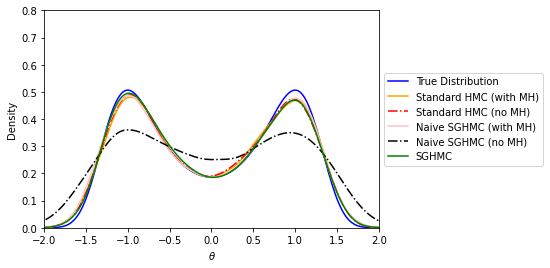

In [32]:
### Figure 1
plt.plot(xs, ys, color = 'blue', label = 'True Distribution')
sns.distplot(theta_hmc_mh1, hist = False, color = 'orange', label = 'Standard HMC (with MH)')
sns.distplot(theta_hmc_nomh1, hist = False, color = 'red', kde_kws={'linestyle':'-.'}, label = 'Standard HMC (no MH)')
sns.distplot(theta_sghmc_naive_mh1, hist = False, color = 'pink', label = 'Naive SGHMC (with MH)')
sns.distplot(theta_sghmc_naive_nomh1, hist = False, color = 'black', kde_kws={'linestyle':'-.'}, label = 'Naive SGHMC (no MH)')
sns.distplot(theta_sghmc1, hist = False, color = 'green', label = 'SGHMC')
plt.axis([-2, 2, 0, 0.8,])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$\\theta$')
plt.show() #T=15000, m=50

### Test Case 2 
Under the same sampling environment setup, our algorithms yields the similar result as the Chen et al paper does, by comparing the Figure 2 and Figure 3 in this notebook and the Figure 2 and Figure 3 in Chen at el paper. (Please see Reference 1 for the paper) 

In [33]:
### Figure 2
U2 = lambda x: 1/2*x**2
gradU2 = lambda x: x

theta_init = np.array([0])
M = np.eye(1)
epsilon=0.1
T=300
m=50
V = np.array([4])
C = np.array([3]) 
V_hat = np.array([4])

In [36]:
theta_sghmc, r_sghmc = sghmc_with_grad(gradU2, theta_init, M , C , V_hat, epsilon, T, m)
theta_hmc, r_hmc = hmc(gradU2, U2, theta_init, M, epsilon, T, m, MH=False)
theta_sghmc_naive_nor, r_sghmc_naive_nor = sghmc_naive(gradU2, U2, theta_init, M, V, epsilon, 1000, m, MH=False, resample=False)
theta_sghmc_naive, r_sghmc_naive = sghmc_naive(gradU2, U2, theta_init, M, V, epsilon, T, m, MH=False, resample=True)

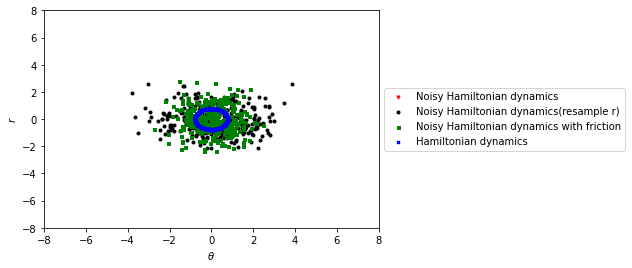

In [37]:
### Figure 2
plt.scatter(theta_sghmc_naive_nor[1000-T:], r_sghmc_naive_nor[1000-T:], color = 'red', marker = 'v', s=9, label = 'Noisy Hamiltonian dynamics')
plt.scatter(theta_sghmc_naive, r_sghmc_naive, color = 'black', marker = 'o', s=9, label = 'Noisy Hamiltonian dynamics(resample r)')
plt.scatter(theta_sghmc, r_sghmc, color = 'green', marker = 's', s=9, label = 'Noisy Hamiltonian dynamics with friction')
plt.scatter(theta_hmc, r_hmc, color = 'blue', marker = 'x', s=9, label = 'Hamiltonian dynamics')
plt.axis([-8, 8, -8, 8,])
plt.xlabel('$\\theta$')
plt.ylabel('$r$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() #T=300, m=50

In [38]:
sigma = np.array([[1, 0.9],[0.9, 1]])
U3 = lambda x: 0.5 * x.T @ np.linalg.inv(sigma) @ x
gradU3 = lambda x: np.linalg.inv(sigma) @ x + np.random.multivariate_normal(np.array([0,0]), np.eye(2))

theta_init = np.array([0,0])
M = np.eye(2)
epsilon=0.1
T=50
m=50
V = V_hat = np.eye(2)
C = 3*np.eye(2)

In [39]:
theta_sghmc3, r_sghmc3 = sghmc_with_grad(gradU3, theta_init, M , C , V_hat, epsilon, T, m)
theta_hmc_mh3, r_hmc_mh3 = hmc(gradU3, U3, theta_init, M, epsilon, T, m, MH=True, resample=True)
theta_sghmc_naive_mh3, r_sghmc_naive_mh3 = sghmc_naive(gradU3, U3, theta_init, M, V, epsilon, T, m, MH=True, resample=True)

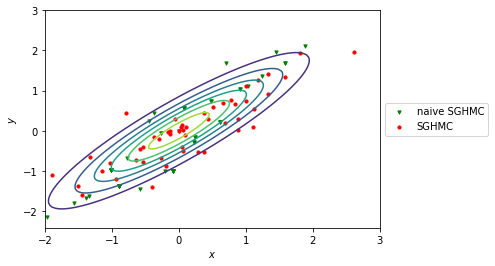

In [40]:
### Figure 3
xs = ys = np.linspace(-2, 3, 100)
x, y = np.meshgrid(xs, ys)
s_inv = np.linalg.inv(sigma)
z = np.exp(-0.5*(s_inv[0,0]*x**2 + 2*s_inv[1,0]*x*y + s_inv[1,1]*y**2))
plt.contour(x, y, z)
#plt.scatter(theta_hmc_mh3[:,0], theta_hmc_mh3[:,1], s = 10, color = 'blue', marker = 'x', label = 'HMC')
plt.scatter(theta_sghmc_naive_mh3[:,0], theta_sghmc_naive_mh3[:,1], s = 10, color = 'green', marker = 'v', label = 'naive SGHMC')
plt.scatter(theta_sghmc3[:,0], theta_sghmc3[:,1], s = 10, color = 'red', marker = 'o', label = 'SGHMC')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Test Case 3 
Our algorithm yields esimates that are almost the same as the true parameters for the sampling process. 

In [41]:
p = 5
true_theta = np.arange(p)
size = 10000
X = np.random.randn(size,p)
y = np.dot(X,true_theta) + np.random.randn(size)
data = np.c_[y,X]

In [42]:
logp_prior_grad = lambda theta: -theta # prior N(0,1)

def logp_data_grad(data, theta):
    """
    log likelihood of a linear regression 
    --------------
    
    Assume that the first column of the data is the predicted variable
    """
    X = data[:,1:]
    y = data[:,0]
    return np.dot(X.T,y) - np.dot(np.dot(X.T,X),theta)

In [45]:
gradU = partial(U_grad_tilde, data=data, logp_data_grad=logp_data_grad, logp_prior_grad=logp_prior_grad, mb_size=1000)
gradU2 = partial(U_grad_tilde, data=data, logp_data_grad=logp_data_grad, logp_prior_grad=logp_prior_grad, mb_size=size)

In [55]:
theta_init = np.zeros(p)
M = np.eye(p)
C = 13*np.eye(p)
V_hat = np.zeros((p,p))
T = 1000
m = 50
epsilon = 0.0001
theta_sghmc4, r_sghmc4 = sghmc_with_grad(gradU, theta_init, M, C, V_hat, epsilon, T, m)

In [56]:
theta_sghmc4.mean(axis=0)  ## very close to the true parameters

array([-0.02171766,  0.9968238 ,  1.98756412,  2.96916673,  3.96712943])

In [57]:
theta_hmc4, r_hmc4 = hmc(gradU, U, theta_init, M, epsilon, T, m, MH=False, resample=False)

In [58]:
theta_hmc4.mean(axis=0)  ## performs even better, the reason could be that all observations are independent

array([-0.0255775 ,  1.0037618 ,  2.0059648 ,  2.99949467,  4.00775561])